<a href="https://colab.research.google.com/github/govardhan-06/ML-models/blob/main/Loan_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
## Display all the columns of the dataframe

pd.pandas.set_option('display.max_columns',None)

In [2]:
dataset=pd.read_csv("loan.csv")

In [3]:
dataset.head()

,age,gender,occupation,education_level,marital_status,income,credit_score,loan_status
0,32,Male,Engineer,Bachelor's,Married,85000,720,Approved
1,45,Female,Teacher,Master's,Single,62000,680,Approved
2,28,Male,Student,High School,Single,25000,590,Denied
3,51,Female,Manager,Bachelor's,Married,105000,780,Approved
4,36,Male,Accountant,Bachelor's,Married,75000,710,Approved


In [4]:
numerical_features=[feature for feature in dataset.columns if dataset[feature].dtype!="O"]
categorical_features=[feature for feature in dataset.columns if dataset[feature].dtype=="O"]
print("Numerical Features Count {}".format(len(numerical_features)))
print("Categorical Features Count {}".format(len(categorical_features)))

Numerical Features Count 3
Categorical Features Count 5


In [5]:
dataset.shape

(61, 8)

In [6]:
## Numerical variables are usually of 2 type
## 1. Continous variable and Discrete Variables

discrete_feature=[feature for feature in numerical_features if len(dataset[feature].unique())<25]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 0


In [7]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature]
print("Continuous feature Count {}".format(len(continuous_feature)))

Continuous feature Count 3


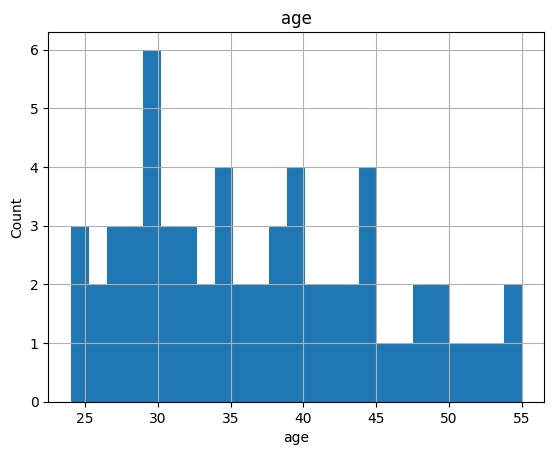

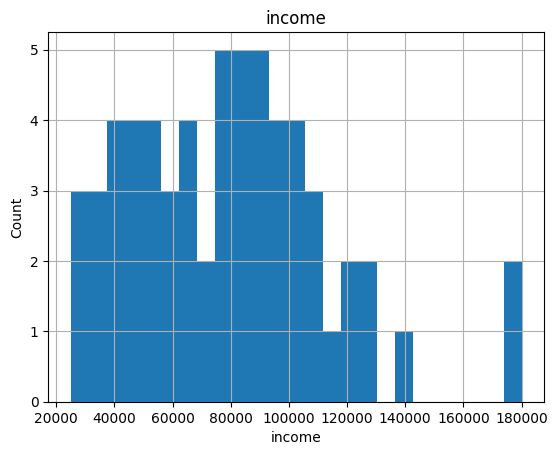

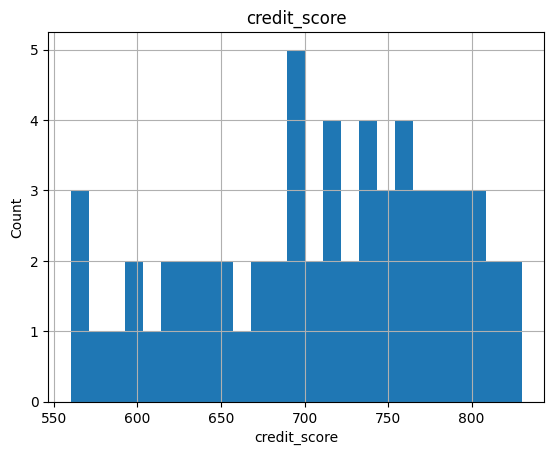

In [8]:
for feature in continuous_feature:
    data=dataset.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

In [9]:
dataset["Approved"]=pd.get_dummies(dataset["loan_status"],dtype=int)["Approved"]
dataset.head()

,age,gender,occupation,education_level,marital_status,income,credit_score,loan_status,Approved
0,32,Male,Engineer,Bachelor's,Married,85000,720,Approved,1
1,45,Female,Teacher,Master's,Single,62000,680,Approved,1
2,28,Male,Student,High School,Single,25000,590,Denied,0
3,51,Female,Manager,Bachelor's,Married,105000,780,Approved,1
4,36,Male,Accountant,Bachelor's,Married,75000,710,Approved,1


In [10]:
dataset.drop(["loan_status"],axis=1,inplace=True)
dataset

,age,gender,occupation,education_level,marital_status,income,credit_score,Approved
0,32,Male,Engineer,Bachelor's,Married,85000,720,1
1,45,Female,Teacher,Master's,Single,62000,680,1
2,28,Male,Student,High School,Single,25000,590,0
3,51,Female,Manager,Bachelor's,Married,105000,780,1
4,36,Male,Accountant,Bachelor's,Married,75000,710,1
...,...,...,...,...,...,...,...,...
56,39,Male,Architect,Master's,Married,100000,770,1
57,25,Female,Receptionist,High School,Single,32000,570,0
58,43,Male,Banker,Bachelor's,Married,95000,760,1
59,30,Female,Writer,Master's,Single,55000,650,1


In [11]:
dataset["Married"]=pd.get_dummies(dataset["marital_status"],dtype=int)["Married"]
dataset.drop(["marital_status"],axis=1,inplace=True)
dataset.head()

,age,gender,occupation,education_level,income,credit_score,Approved,Married
0,32,Male,Engineer,Bachelor's,85000,720,1,1
1,45,Female,Teacher,Master's,62000,680,1,0
2,28,Male,Student,High School,25000,590,0,0
3,51,Female,Manager,Bachelor's,105000,780,1,1
4,36,Male,Accountant,Bachelor's,75000,710,1,1


In [12]:
dataset["Male"]=pd.get_dummies(dataset["gender"],dtype=int)["Male"]
dataset.drop(["gender"],axis=1,inplace=True)
dataset.head()

,age,occupation,education_level,income,credit_score,Approved,Married,Male
0,32,Engineer,Bachelor's,85000,720,1,1,1
1,45,Teacher,Master's,62000,680,1,0,0
2,28,Student,High School,25000,590,0,0,1
3,51,Manager,Bachelor's,105000,780,1,1,0
4,36,Accountant,Bachelor's,75000,710,1,1,1


In [13]:
dataset.to_csv("loanupdated.csv",index=False)

In [14]:
dataset=pd.read_csv("loanupdated.csv")

In [15]:
dataset.isnull().sum()

age                0
occupation         0
education_level    0
income             0
credit_score       0
Approved           0
Married            0
Male               0
dtype: int64

In [16]:
dataset["education_level"].unique()

array(["Bachelor's", "Master's", 'High School', "Associate's", 'Doctoral'],
      dtype=object)

In [32]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')
encoding=enc.fit_transform(dataset[['education_level']]).toarray()

In [29]:
feature_names = enc.get_feature_names_out()
len(feature_names)

5

In [34]:
pd.DataFrame(encoding,columns=feature_names)

,education_level_Associate's,education_level_Bachelor's,education_level_Doctoral,education_level_High School,education_level_Master's
0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...
56,0.0,0.0,0.0,0.0,1.0
57,0.0,0.0,0.0,1.0,0.0
58,0.0,1.0,0.0,0.0,0.0
59,0.0,0.0,0.0,0.0,1.0


In [ ]:
onehotencoded=pd.DataFrame(encoding,columns=feature_names)
dataset=dataset.drop(columns=["education_level"])
dataset=pd.concat(objs=[dataset,onehotencoded],axis=1)
dataset.head()

In [38]:
categorical_features=[feature for feature in dataset.columns if dataset[feature].dtype=="O"]
categorical_features

['occupation']

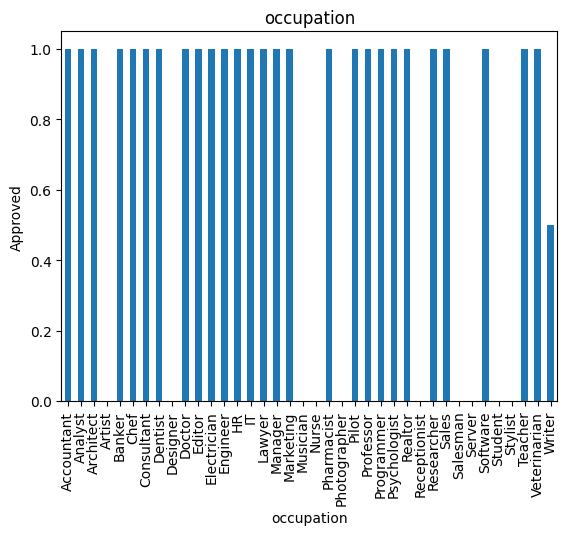

In [40]:
for feature in categorical_features:
    dataset.groupby(feature)['Approved'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('Approved')
    plt.title(feature)
    plt.show()

In [41]:
dataset["occupation"].unique()

array(['Engineer', 'Teacher', 'Student', 'Manager', 'Accountant', 'Nurse',
       'Lawyer', 'Artist', 'IT', 'Doctor', 'Consultant', 'Analyst',
       'Salesman', 'Marketing', 'Architect', 'Designer', 'Pharmacist',
       'Researcher', 'Professor', 'Pilot', 'Receptionist', 'Banker',
       'Writer', 'Chef', 'Veterinarian', 'Sales', 'HR', 'Electrician',
       'Realtor', 'Photographer', 'Editor', 'Programmer', 'Dentist',
       'Musician', 'Psychologist', 'Server', 'Software', 'Stylist'],
      dtype=object)

In [42]:
for feature in categorical_features:
    temp=dataset.groupby(feature)['Approved'].count()/len(dataset)
    temp_df=temp[temp>0.01].index
    dataset[feature]=np.where(dataset[feature].isin(temp_df),dataset[feature],'Rare_var')

In [47]:
for feature in categorical_features:
    labels_ordered=dataset.groupby([feature])['Approved'].mean().sort_values().index
    labels_ordered={k:i for i,k in enumerate(labels_ordered,0)}
    dataset[feature]=dataset[feature].map(labels_ordered)

In [48]:
feature_scale=[feature for feature in dataset.columns if feature not in ['Approved']]

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(dataset[feature_scale])

MinMaxScaler()

In [49]:
dataset.head(10)

,age,occupation,income,credit_score,Approved,Married,Male,education_level_Associate's,education_level_Bachelor's,education_level_Doctoral,education_level_High School,education_level_Master's
0,32,35,85000,720,1,1,1,0.0,1.0,0.0,0.0,0.0
1,45,12,62000,680,1,0,0,0.0,0.0,0.0,0.0,1.0
2,28,2,25000,590,0,0,1,0.0,0.0,0.0,1.0,0.0
3,51,31,105000,780,1,1,0,0.0,1.0,0.0,0.0,0.0
4,36,37,75000,710,1,1,1,0.0,1.0,0.0,0.0,0.0
5,24,9,48000,640,0,0,0,1.0,0.0,0.0,0.0,0.0
6,42,32,120000,790,1,1,1,0.0,0.0,1.0,0.0,0.0
7,29,3,38000,620,0,0,0,0.0,1.0,0.0,0.0,0.0
8,37,33,92000,750,1,1,1,0.0,0.0,0.0,0.0,1.0
9,48,28,180000,820,1,1,0,0.0,0.0,1.0,0.0,0.0


In [50]:
scaler.transform(dataset[feature_scale])

array([[0.25806452, 0.94594595, 0.38709677, 0.59259259, 1.        ,
        1.        , 0.        , 1.        , 0.        , 0.        ,
        0.        ],
       [0.67741935, 0.32432432, 0.23870968, 0.44444444, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        1.        ],
       [0.12903226, 0.05405405, 0.        , 0.11111111, 0.        ,
        1.        , 0.        , 0.        , 0.        , 1.        ,
        0.        ],
       [0.87096774, 0.83783784, 0.51612903, 0.81481481, 1.        ,
        0.        , 0.        , 1.        , 0.        , 0.        ,
        0.        ],
       [0.38709677, 1.        , 0.32258065, 0.55555556, 1.        ,
        1.        , 0.        , 1.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.24324324, 0.1483871 , 0.2962963 , 0.        ,
        0.        , 1.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.58064516, 0.86486486, 0.61290323, 0.85185185, 1.

In [51]:
# transform the train and test set, and add on the Id and SalePrice variables
data = pd.concat([dataset[['Approved']].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(dataset[feature_scale]), columns=feature_scale)],
                    axis=1)

In [52]:
data

,Approved,age,occupation,income,credit_score,Married,Male,education_level_Associate's,education_level_Bachelor's,education_level_Doctoral,education_level_High School,education_level_Master's
0,1,0.258065,0.945946,0.387097,0.592593,1.0,1.0,0.0,1.0,0.0,0.0,0.0
1,1,0.677419,0.324324,0.238710,0.444444,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0,0.129032,0.054054,0.000000,0.111111,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,1,0.870968,0.837838,0.516129,0.814815,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1,0.387097,1.000000,0.322581,0.555556,1.0,1.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
56,1,0.483871,0.378378,0.483871,0.777778,1.0,1.0,0.0,0.0,0.0,0.0,1.0
57,0,0.032258,0.162162,0.045161,0.037037,0.0,0.0,0.0,0.0,0.0,1.0,0.0
58,1,0.612903,0.432432,0.451613,0.740741,1.0,1.0,0.0,1.0,0.0,0.0,0.0
59,1,0.193548,0.270270,0.193548,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [69]:
## for feature slection

from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

# to visualise al the columns in the dataframe
pd.pandas.set_option('display.max_columns', None)

In [70]:
X_train=data.drop(["Approved"],axis=1)
y_train=data["Approved"]

In [71]:
  X_train.head()

,age,occupation,income,credit_score,Married,Male,education_level_Associate's,education_level_Bachelor's,education_level_Doctoral,education_level_High School,education_level_Master's
0,0.258065,0.945946,0.387097,0.592593,1.0,1.0,0.0,1.0,0.0,0.0,0.0
1,0.677419,0.324324,0.238710,0.444444,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.129032,0.054054,0.000000,0.111111,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.870968,0.837838,0.516129,0.814815,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.387097,1.000000,0.322581,0.555556,1.0,1.0,0.0,1.0,0.0,0.0,0.0


In [72]:
### Apply Feature Selection
# first, I specify the Lasso Regression model, and I
# select a suitable alpha (equivalent of penalty).
# The bigger the alpha the less features that will be selected.

# Then I use the selectFromModel object from sklearn, which
# will select the features which coefficients are non-zero

feature_sel_model = SelectFromModel(Lasso(alpha=0.005, random_state=0)) # remember to set the seed, the random state in this function
feature_sel_model.fit(X_train, y_train)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [73]:
feature_sel_model.get_support()

array([ True,  True, False,  True,  True,  True, False,  True, False,
       False,  True])

In [74]:

# let's print the number of total and selected features
sel=SelectFromModel(Lasso(alpha=0.005,random_state=0))
sel.fit(X_train,y_train)
# this is how we can make a list of the selected features
selected_feat = X_train.columns[(feature_sel_model.get_support())]

# let's print some stats
print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format(
    np.sum(feature_sel_model.estimator_.coef_ == 0)))

total features: 11
selected features: 7
features with coefficients shrank to zero: 4


In [75]:
selected_feat

Index(['age', 'occupation', 'credit_score', 'Married', 'Male',
       'education_level_Bachelor's', 'education_level_Master's'],
      dtype='object')

In [76]:
X_train=X_train[selected_feat]

In [77]:
X_train.head()

,age,occupation,credit_score,Married,Male,education_level_Bachelor's,education_level_Master's
0,0.258065,0.945946,0.592593,1.0,1.0,1.0,0.0
1,0.677419,0.324324,0.444444,0.0,0.0,0.0,1.0
2,0.129032,0.054054,0.111111,0.0,1.0,0.0,0.0
3,0.870968,0.837838,0.814815,1.0,0.0,1.0,0.0
4,0.387097,1.000000,0.555556,1.0,1.0,1.0,0.0


In [78]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X_train,y_train,test_size=0.2,random_state=0)

In [79]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
classifier.fit(x_train,y_train)

LogisticRegression()

In [81]:
classifier.score(x_test,y_test)

0.9230769230769231

In [82]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm=confusion_matrix(y_test,classifier.predict(x_test))
cm

array([[3, 0],
       [1, 9]])